# Merge the Data into one Dataset

In [0]:
#Upload ControlData5000 and DepData5000 (All blanks, deleted, removed, etc. rows have been taken out)
import pandas as pd
from google.colab import files
uploaded=files.upload() 

Saving ControlData5000.csv to ControlData5000 (2).csv
Saving DEPDATA5000.csv to DEPDATA5000 (2).csv


In [0]:
#Merge the Datasets
dep_data=pd.read_csv('DEPDATA5000.csv')
control_data=pd.read_csv('ControlData5000.csv')
final=pd.concat([dep_data,control_data])
final=final.sample(frac=1)

In [0]:
#Save Dataset as DepressionControl.csv
final.to_csv('DepressionControl.csv')
from google.colab import files
files.download('DepressionControl.csv')

# Preprocessing

In [0]:
#Import Statements, colab requires you to donwload the stopwords and punkt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Functions: Remove stopwords, lemmatize the words, tokenize the words, remove punctuation
def remove_stopwords(text):
  sw=stopwords.words('english')
  words = [w for w in text if not w in sw]
  return words
def make_lower(text):
  words= text.lower()
  return words
def remove_punc(text):
  words = [word for word in text if word.isalpha()]
  return words
def lemmatize_words(text):
  porter=PorterStemmer()
  words=[porter.stem(word) for word in text]
  return words

In [0]:
#Put in Dataset here! (Previously used RedditData.csv, but now using DepressionControl.csv. The difference is that one has r/DepressionAnxiety and the other is r/depression only)
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('RedditData.csv')


Saving RedditData.csv to RedditData.csv


In [0]:
#Apply the functions on the Dataset
df=pd.DataFrame(df)
df.Body=df.Body.astype(str)
df['Body']=df['Body'].apply(make_lower)
df['Body']=df['Body'].apply(word_tokenize)
df['Body']=df['Body'].apply(remove_punc)
df['Body']=df['Body'].apply(lemmatize_words)
df['Body']=df['Body'].apply(remove_stopwords)


In [0]:
dff=pd.read_csv('RedditData.csv')

In [0]:
#Save the cleaned Dataset as DepControlTenCleaned.csv
df.to_csv('DepControlTenCleaned.csv')
from google.colab import files
files.download('DepControlTenCleaned.csv')

In [0]:
dff=pd.read_csv('RedditData.csv')
dff.Body=dff.Body.astype(str)
dff['Body']=dff['Body'].apply(sent_tokenize)
newer_dict={'Bodyy':[]}

def make_sentword(data):
  for row in range(0,len(data)):
    newvar=[]
    for sent in data['Body'][row]:
      sent=make_lower(sent)
      sent=word_tokenize(sent)
      sent=remove_punc(sent)
      sent=lemmatize_words(sent)
      sent=remove_stopwords(sent)
      newvar.append(sent)
    data['Body'][row]=newvar
    newer_dict['Bodyy'].append(newvar)
    print(data['Body'][row])
dff=make_sentword(dff)

In [0]:
#Save the cleaned Dataset as DepControlTenCleaned.csv
new_dict.to_csv('sentwords.csv')
from google.colab import files
files.download('sentwords.csv')

In [0]:
new_dict = pd.DataFrame(new_dict)

# Word Embeddings

In [0]:
#Import statements, using the Gensim library to import the Word2Vec model to train the word embeddings
import pandas as pd
from gensim.models import Word2Vec
import multiprocessing


In [0]:
#Using the basic params for a Word2Vec model, will take a few minutes
emd_dim=300
w2v=Word2Vec(df['Body'],size=emd_dim,window=40,min_count=500,negative=15,iter=35,workers=multiprocessing.cpu_count())
word_vectors=w2v.wv

In [0]:
#Exploration

#Print out the vocab
vocabulary=list(w2v.wv.vocab)
print(vocabulary,"\n")

#Print out the similar words
result=word_vectors.similar_by_word('depress')
result

['two', 'one', 'last', 'almost', 'year', 'final', 'old', 'get', 'turn', 'made', 'job', 'even', 'though', 'know', 'ca', 'tell', 'differ', 'eat', 'stuff', 'without', 'got', 'stori', 'time', 'right', 'quit', 'bit', 'whi', 'felt', 'like', 'share', 'thi', 'happi', 'wa', 'first', 'girl', 'becaus', 'went', 'ask', 'stop', 'start', 'told', 'shit', 'want', 'week', 'month', 'ago', 'famili', 'school', 'mom', 'suicid', 'go', 'would', 'peopl', 'love', 'friend', 'doe', 'hate', 'feel', 'sorri', 'today', 'work', 'everyon', 'els', 'make', 'minut', 'na', 'head', 'alon', 'hope', 'tri', 'fun', 'wish', 'edit', 'decid', 'end', 'talk', 'good', 'night', 'thank', 'past', 'look', 'see', 'veri', 'ani', 'someth', 'littl', 'experi', 'kid', 'home', 'show', 'read', 'take', 'also', 'understand', 'come', 'sinc', 'need', 'done', 'well', 'took', 'anyon', 'us', 'actual', 'way', 'day', 'help', 'new', 'left', 'miss', 'back', 'give', 'away', 'keep', 'kind', 'might', 'bad', 'bed', 'anyth', 'live', 'die', 'life', 'leav', 'bett

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('anxieti', 0.499223530292511),
 ('mental', 0.4805973768234253),
 ('sad', 0.4665585458278656),
 ('suicid', 0.4294292628765106),
 ('wors', 0.39743369817733765),
 ('feel', 0.3631073236465454),
 ('bad', 0.33336353302001953),
 ('becaus', 0.319441556930542),
 ('understand', 0.30476900935173035),
 ('becom', 0.2947087287902832)]

In [0]:
#Slightly Adapted function to view the word embeddings (change n_iter to 2000)
def tsne_plot(model):
    labels = []
    tokens = []

    for word in w2v.wv.vocab:
        tokens.append(w2v[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('test.pdf')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


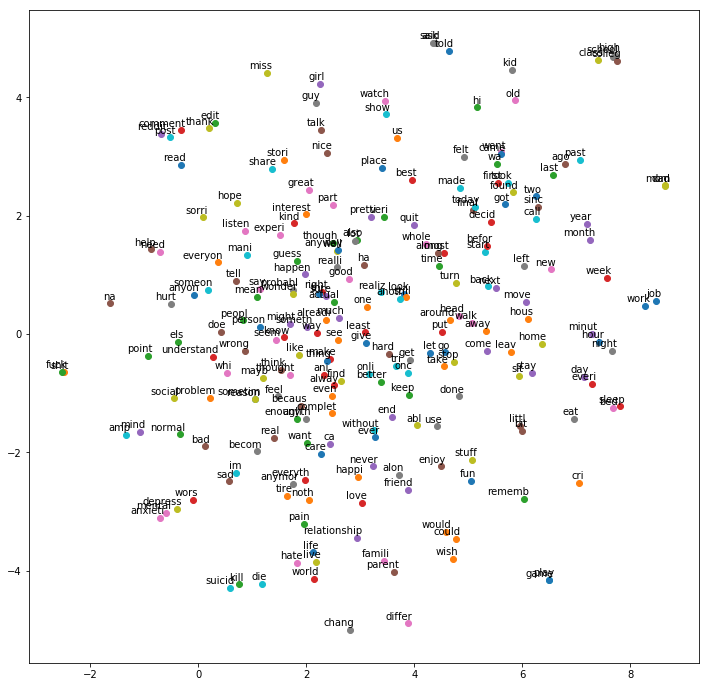

In [0]:
#Plot the word embeddings function and download the graph
tsne_plot(w2v)
from google.colab import files
files.download('test.pdf')

In [0]:
#Save the word embeddings in a txt file for future use
w2v.wv.save_word2vec_format('DepConWord_embeddings.txt', binary=False)
from google.colab import files
files.download('DepConWord_embeddings.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Reading Word Embeddings

In [0]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
#SentWord, wordembeddings.txt

In [0]:
#Function to convert the embeddings into a matrix, adapted from Medium article
wordvector_dict={"word":[],
                 "vector":[]}
def create_wordvector(filepath):
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            wordvector_dict['word'].append(word)
            wordvector_dict['vector'].append(vector)
 

In [0]:

create_wordvector('wordembeddings.txt')
wordvector_dict=pd.DataFrame(wordvector_dict)
wordvector_dict

In [0]:
def changeinttostring(vectornum):
  arr=[]
  for i in range(0,300):
    arr.append(float(wordvector_dict['vector'][vectornum][i]))
  return arr



In [0]:
df=pd.read_csv('SentWord.csv')
df

In [0]:
from ast import literal_eval
df['RightBody'] = df['RightBody'].apply(literal_eval)


In [0]:
def avg(something):
  stand=0.0
  count=0
  for i in something:
    stand=stand+i
    count=count+1
  return stand/count
print(df['RightBody'][16])

[['seen', 'great', 'post', 'comment', 'onli', 'upvot'], ['whi', 'peopl', 'upvot'], ['alway', 'tri', 'upvot', 'hread', 'comment'], ['also'], []]


In [0]:
for row in df['RightBody']:
  for sent in row:
    if sent==[]:
      row.remove(sent)


In [0]:



#Create Max, Min, and Average Vectors for a Sentence
from numpy import array
import numpy as np

vectdict={"AVGVector":[]}
AllIndexes=[]
for row in range(0,len(df)):
  print("ROW",row)
  SentenceIndexes=[]
  for sent in df['RightBody'][row]:
    WordIndexes=[]
    for word in sent:
      try:
        ind=wordvector_dict.index[wordvector_dict.word == word]
      except:
        print(row)
      if len(ind)==1:
        WordIndexes.append(changeinttostring(ind[0]))
    SentenceIndexes.append(WordIndexes)
  AllIndexes.append(SentenceIndexes)
AllIndexes=array(AllIndexes)

count=0
for post in AllIndexes:
  print("POST# ",count,"\n")
  count=count+1
  for sentence in post:
    maximum=np.vstack([sentence]).avg(axis=0)
  AllMax=np.vstack([maximum]).avg(axis=0)
  maxlist=maximum.tolist()
  print(maxlist)
  vectdict['AVGVector'].append(maxlist) 


In [0]:
print(df['RightBody'][62])

In [0]:
Vectors=pd.DataFrame(vectdict)
Vectors

In [0]:
final=pd.concat([df,Vectors],axis=1)
final


In [0]:
final.to_csv('VectorSentence_Max.csv')
from google.colab import files
files.download('VectorSentence_Max.csv')

# More Visualization


In [0]:
from google.colab import files
uploaded=files.upload()
import pandas as pd


Saving RedditData.csv to RedditData (1).csv


In [0]:
df=pd.read_csv('RedditData.csv')

In [0]:
control=[]
depression=[]
for i in range(0,len(df)):
  if df['Label'][i]==0:
    control.append(df['Body'][i])
  else:
    depression.append(df['Body'][i])

In [0]:
depression=pd.DataFrame(depression)
control=pd.DataFrame(control)

In [0]:
depression[0]

In [0]:
import nltk
from nltk import word_tokenize

from nltk import FreqDist
df=pd.DataFrame(df)
df.Body=df.Body.astype(str) 
df['Body']=df['Body'].apply(make_lower)
df['Body']=df['Body'].apply(word_tokenize)
df['Body']=df['Body'].apply(remove_punc)
df['Body']=df['Body'].apply(lemmatize_words)
df['Body']=df['Body'].apply(remove_stopwords)


In [0]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist

In [0]:
a = control[0].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
words=remove_punc(words)
#words=lemmatize_words(words)
#words=remove_stopwords(words)
word_dist = nltk.FreqDist(words)
print (word_dist)
controlwords=['I','Me','You']
controlfreq=[21782,3786,3359]

<FreqDist with 14168 samples and 370315 outcomes>


In [0]:
rslt

In [0]:
a = depression[0].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
words=remove_punc(words)
#words=lemmatize_words(words)
#words=remove_stopwords(words)
word_dist = nltk.FreqDist(words)
print (word_dist)
top_N = 50
conrslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
conrslt
depwords=['I','Me','You']
depfreq=[43113,7213,3219]

<FreqDist with 13924 samples and 591990 outcomes>


In [0]:
import matplotlib.pyplot as plt 
import numpy as np

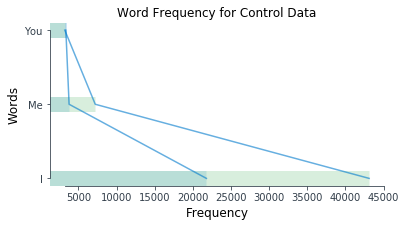

In [0]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['legend.fontsize']= 'x-large'
my_range=list(range(0,len(controlfreq)))
fig, ax = plt.subplots(figsize=(6,3))

plt.hlines(y=my_range, xmin=0, xmax=controlfreq, color='#007acc', alpha=0.4, linewidth=15)
plt.hlines(y=my_range, xmin=0, xmax=depfreq, color='#c8e8cf', alpha=0.7, linewidth=15)
plt.plot(controlfreq, controlwords, markersize=15, color='#007acc', alpha=0.6)
plt.plot(depfreq, depwords, markersize=15, color='#007acc', alpha=0.6)


plt.title('Word Frequency for Control Data', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)

ax.xaxis.label.set_size(12)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('DepGraph.tiff')


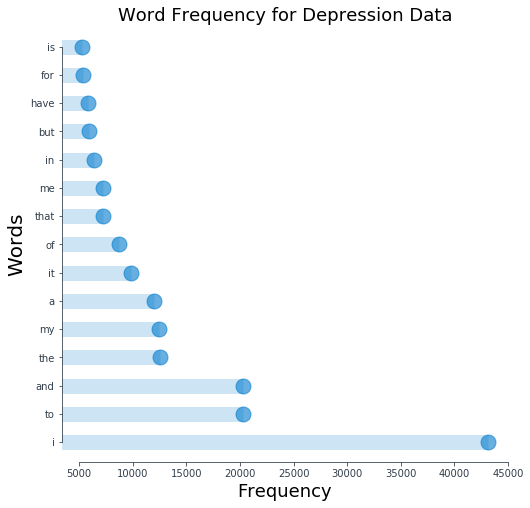

In [0]:
#PLOT Depression
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['legend.fontsize']= 'x-large'
my_range=list(range(0,len(depnewrslt['Frequency'])))
fig, ax = plt.subplots(figsize=(8,8))

plt.hlines(y=my_range, xmin=0, xmax=depnewrslt['Frequency'], color='#007acc', alpha=0.2, linewidth=15)
plt.plot(depnewrslt['Frequency'], depnewrslt['Word'], "o", markersize=15, color='#007acc', alpha=0.6)
plt.title('Word Frequency for Depression Data', fontsize=18)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Words', fontsize=20)
ax.xaxis.label.set_size(18)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('DepGraph.tiff')

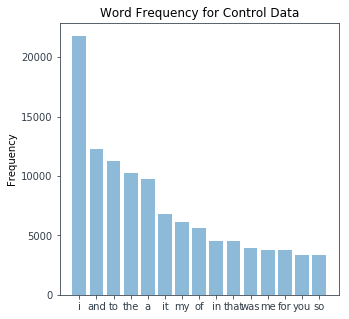

In [0]:
plt.figure(figsize=(5,5))
plt.bar(newrslt['Word'],newrslt['Frequency'],  align='center', alpha=0.5)

plt.ylabel('Frequency')
plt.title('Word Frequency for Control Data')
plt.savefig('DepGraph.tiff')
plt.show()

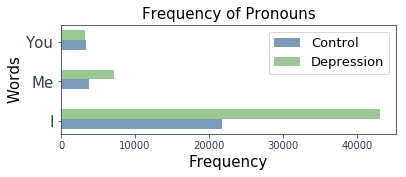

In [0]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,2))

data = [[21782., 3786., 3359.],
  [43113., 7213., 3219.]]
X = np.arange(3)
plt.barh(X + 0.00, data[0], color='#7b9bba', height = 0.25,label="Control")
plt.barh(X + 0.25, data[1], color='#9ac993', height = 0.25,label='Depression')
plt.legend(loc='upper right', fontsize=13)
plt.yticks(X+0.075, controlwords, fontsize=15, rotation=0)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.title("Frequency of Pronouns", fontsize=15)
plt.savefig("pronouns.tiff")
plt.show()

In [0]:
Frefrom PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [0]:
a = df['Body'].str.lower().str.cat(sep=' ')

In [0]:
a = df['Body'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
words=remove_punc(words)
words=remove_stopwords(words)
words=remove_stopwords(words)



In [0]:
words

In [0]:
an=' '.join(words)


In [0]:
an

'life give shit know much say scattered near far even know want die others want live therapist says need support even fucking possible friend rode metro service project morning trip never issue afternoon always toss one afternoon asshole decided harassing teenage girls acceptable way spend metro ride comments started comments us cute little white girls escalated obscenities accusing us racist responding friend terrified homeless man spend entire ride far talking glancing around paranoia pacing door casually walked glared asshole purposefully stood right front friend gestured us stand pointing seats away man waiting nod okay sat next asshole would pass get us never spoke word us friend spent rest minute metro ride watched sweet strangely protective homeless man got stop even stood stared asshole harassed us would tempted follow us amazing next month year anniversary fathers death years old murdered street something impacted life greatly imagine often days much worse others event one day

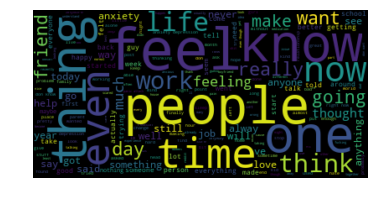

In [0]:
an=' '.join(words)
wordcloud = WordCloud().generate(a)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("cloud.tiff")

In [0]:
file="new.txt"
f = open(file, "a")
f.write(an)
f.close()


In [0]:
from google.colab import files
files.download('DepGraph.tiff')

In [0]:
wordcloud = WordCloud().generate(newstr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("cloud.tiff")

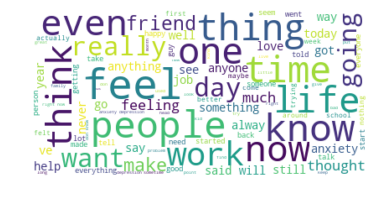

In [0]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(a)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("cloud.tiff")


In [0]:
from google.colab import files
files.download('pronouns.tiff')

# Deep Learning and the Word Embeddings Matrix

In [0]:
#More import Statements! Yay!
#import CLEANMAX.csv
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras import layers
from google.colab import files
import pandas as pd
import numpy as np
uploaded=files.upload()

Saving CLEANMIN.csv to CLEANMIN (1).csv


In [0]:
df=pd.read_csv('MINVEC.csv')
from ast import literal_eval
df['MinVector'] = df['MinVector'].apply(literal_eval)

droplist=[]
for i in range(0,len(df['MinVector'])):
  if df['MinVector'][i]==[]:
    droplist.append(i)    
df=df.drop(droplist,axis=0)

In [0]:
#@title Word Embeddings and Reddit Data { display-mode: "form" }
#Cell for Word Embeddings and Reddit Data

df=pd.read_csv('RedditData.csv')
df.Body=df.Body.astype(str)
#Seperate into X and y
x = df['Body'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1000)

#Convert the words into numbers the computer can understand (basically gives the index to how 'important' the word is)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

#Size of the array of words and the max length each body has to be
print(tokenizer.word_index)
print(X_train[1])
print(vocab_size)
print(msk.size)
vocab_size = len(tokenizer.word_index) + 1
maxlen=12000

# Pad sequences with zeros so they are all the same size
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#Function to convert the embeddings into a matrix, adapted from Medium article

def create_embedding_matrix(filepath, word_index, embedding_dim):
    #Reserve the 0 for the Unknowns!
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

#Create the matrix, keep the same embedding_dim as the word2vec embeddings
embedding_dim = 300
embedding_matrix = create_embedding_matrix('wordembeddings.txt', tokenizer.word_index, embedding_dim)

In [0]:
#Cell for CleanMax and CleanMin
df=pd.read_csv('CLEANMIN.csv')
from ast import literal_eval
df['MinVector'] = df['MinVector'].apply(literal_eval)

In [0]:
x = np.array(list(df['MinVector']))
x=np.expand_dims(x, axis=2)   #COMMENT THIS LINE OUT FOR NO CONVOLUTION!
y = np.array(list(df['Label']))
print(x.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1000)

print(X_train.shape)




In [0]:
import keras
from keras import optimizers
#NO CONVOLUTION (make sure to take out line in the X_train in cell above 2)
learning_rate=0.0001
nodes=10
model = Sequential()
model.add(layers.Dense(5, activation='relu',input_shape=(300,)))
model.add(layers.Dense(5, activation='relu',input_shape=(300,)))

model.add(layers.Dense(1, activation='sigmoid'))
adm=keras.optimizers.Adam(lr=learning_rate,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adm,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 1505      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 1,541
Trainable params: 1,541
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_filters=60
kernel_size=3
strides=1
learning_rate=0.0001

import keras
from keras import optimizers

model= Sequential()
model.add(layers.Conv1D(36,3, strides=strides, activation='relu',batch_input_shape=(None,300,1))) 

model.add(layers.Conv1D(36,5, strides=1, activation='relu',padding='causal')) 
model.add(layers.Dropout(0.25))

model.add(layers.Conv1D(36,5, strides=1, activation='relu',padding='causal')) 

#model.add(layers.Conv1D(20,5, strides=1, activation='relu',padding='causal'))
#model.add(layers.MaxPooling1D())
#model.add(layers.Dropout(0.25))
#model.add(layers.Conv1D(16,kernel_size, strides=strides, activation='relu'))
model.add(layers.MaxPooling1D())

#model.add(layers.LSTM(input_shape=(300,1),units=(10)))
model.add(layers.Flatten())#Need
model.add(layers.Dense(30,activation='relu'))

model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
adm=keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adm,
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

In [0]:
#Train the model and evaluate
batch_sz=8

history = model.fit(X_train, y_train,
                    epochs=20,#was 10 earlier
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=batch_sz
                   )
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

In [0]:
#Plot function to view the graphs of accuracy and loss
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',linewidth=2.0)
    plt.plot(x, val_acc, 'r', label='Validation acc',linewidth=2.0)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    
    ax = plt.gca()
    ax.set_facecolor('xkcd:light gray')
    ax.grid(False)
    #axes.set_ylim([0.7,1])
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    ax = plt.gca()
    ax.set_facecolor('xkcd:light gray')
    ax.grid(False)
    plt.legend()
    plt.savefig('new.tiff')

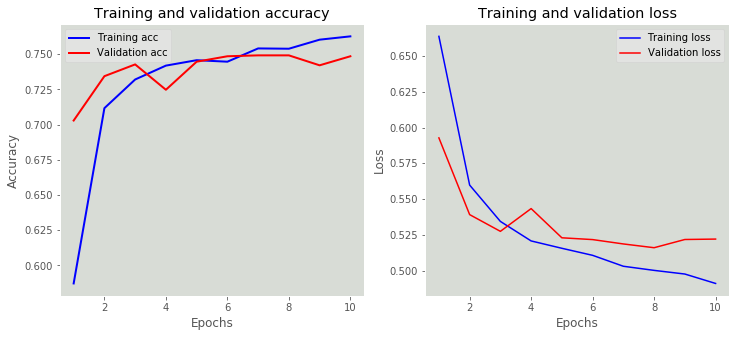

In [0]:
#Plot the graphs
plot_history(history)

In [0]:
y_true=y_test
y_pred=list(model.predict_classes(X_test).reshape((-1,)))
y_pred_proba=list(model.predict(X_test).reshape((-1,)))
print(y_true)
print(y_pred)
print(y_pred_proba)


[0 1 0 ... 1 1 0]
[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 

In [0]:
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
print(list(incorrects[0]))



[1, 2, 9, 10, 11, 13, 14, 22, 26, 28, 29, 30, 32, 37, 44, 46, 47, 55, 59, 65, 69, 73, 75, 80, 85, 89, 90, 92, 93, 96, 99, 103, 107, 111, 112, 129, 138, 146, 152, 155, 157, 160, 163, 164, 165, 167, 172, 180, 193, 203, 208, 210, 215, 221, 222, 223, 235, 240, 241, 245, 255, 256, 259, 265, 271, 280, 282, 283, 286, 292, 302, 305, 306, 307, 310, 311, 331, 333, 345, 352, 353, 357, 359, 361, 362, 364, 376, 377, 381, 388, 392, 393, 396, 403, 407, 408, 411, 412, 413, 414, 417, 422, 426, 427, 429, 432, 436, 438, 441, 448, 449, 451, 455, 471, 472, 475, 477, 488, 490, 492, 500, 501, 503, 506, 507, 510, 513, 514, 523, 525, 534, 540, 561, 573, 575, 579, 581, 584, 589, 591, 598, 599, 605, 608, 611, 618, 619, 622, 625, 626, 630, 634, 646, 647, 651, 652, 657, 663, 664, 665, 666, 667, 668, 674, 677, 679, 680, 686, 688, 691, 704, 705, 708, 709, 710, 713, 717, 720, 728, 730, 732, 735, 737, 738, 739, 748, 751, 758, 763, 770, 777, 783, 784, 785, 789, 790, 793, 796, 797, 799, 802, 803, 806, 807, 818, 821, 822

In [0]:
#F1 SCORE COMPUTATION
from sklearn.metrics import f1_score
score = f1_score(y_pred, y_true)
print(score)

0.7400257400257401


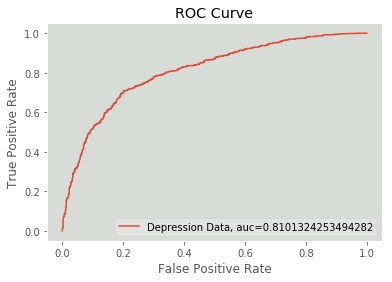

In [0]:
#Plot the ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Depression Data, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
ax = plt.gca()
ax.set_facecolor('xkcd:light gray')
ax.grid(False)
plt.legend(loc=4)
plt.savefig('new.tiff')
plt.show()

In [0]:
from google.colab import files
files.download('new.tiff')

In [0]:
#Visualize what the probabilities were and why they were wrong
print('Len of True Labels:',len(y_true),'Array:',y_true)
print('Len of Predictions:',len(y_pred),'Array:',y_pred)
print(y_pred_proba)

# Cross Validation

Using Randomized CV Search

In [0]:
import keras
from keras import optimizers
import numpy as np
def my_model(learning_rate,num_filters,kernel_size,strides,numberfilterst):

  model= Sequential()
  model.add(layers.Conv1D(num_filters,kernel_size, strides=strides, activation='relu',batch_input_shape=(None,300,1)))
  model.add(layers.Conv1D(numberfilterst,10, strides=1, activation='relu',padding='causal')) #model.add(layers.Dropout(0.25)) 
  model.add(layers.Conv1D(100,5, strides=1, activation='relu',padding='causal')) #model.add(layers.MaxPooling1D(1)) #model.add(layers.Dropout(0.25))
  model.add(layers.Flatten())#Need
  model.add(layers.Dense(10,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  adm=keras.optimizers.Adam(lr=learning_rate)
  model.compile(optimizer=adm,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  print(model.summary())
  return model



from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Params
epochs=50

x = np.array(list(df['MaxVector']))
x=np.expand_dims(x, axis=2)   #COMMENT THIS LINE OUT FOR NO CONVOLUTION!
y = np.array(list(df['Label']))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1000)

# Parameter grid for grid search
param_grid = dict(learning_rate=[0.01,0.001,0.0001,0.00001,0.000001],
                  num_filters=[3,5,8,16,32,64,128],
                  kernel_size=[3,5,10,15,30],
                  strides=[1,2,3],
                  numberfilterst=[5,8,16,32,64,128]
                 )

model = KerasClassifier(build_fn=my_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 298, 32)           128       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 298, 128)          41088     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 298, 100)          64100     
_________________________________________________________________
flatten_3 (Flatten)          (None, 29800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                298010    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 403,337
Trainable params: 403,337
Non-trainable params: 0
__________

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 298, 32)           128       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 298, 128)          41088     
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 298, 100)          64100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 29800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                298010    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 403,337
Trainable params: 403,337
Non-trainable params: 0
_________________________________________________________________
None

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 152.2min finished


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 136, 3)            93        
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 136, 5)            155       
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 136, 100)          2600      
_________________________________________________________________
flatten_23 (Flatten)         (None, 13600)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                136010    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 138,869
Trainable params: 138,869
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
print("Best Score:",grid_result.best_score_)
print(grid_result.best_params_)
print("Test accuracy:",test_accuracy)


Best Score: 0.731618434823211
{'strides': 2, 'numberfilterst': 5, 'num_filters': 3, 'learning_rate': 1e-05, 'kernel_size': 30}
Test accuracy: 0.7337620587977566


# Word Embeddings ONLY

In [0]:
#More import Statements! Yay!
#Make sure to import the original 10000 dataset and the word embeddings (which are basically the weights)
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras import layers
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('RedditData.csv')
df.Body=df.Body.astype(str)

Saving RedditData.csv to RedditData (10).csv
Saving wordembeddings.txt to wordembeddings (8).txt


In [0]:
#Seperate into X and y
x = df['Body'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1000)


#Convert the words into numbers the computer can understand (basically gives the index to how 'important' the word is)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

#Size of the array of words and the max length each body has to be
vocab_size = len(tokenizer.word_index) + 1
maxlen=12000

# Pad sequences with zeros so they are all the same size
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
#Function to convert the embeddings into a matrix, adapted from Medium article

def create_embedding_matrix(filepath, word_index, embedding_dim):
    #Reserve the 0 for the Unknowns!
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:
#Create the matrix, keep the same embedding_dim as the word2vec embeddings
embedding_dim = 300
embedding_matrix = create_embedding_matrix('wordembeddings.txt', tokenizer.word_index, embedding_dim)

ValueError: ignored

In [0]:
#Create a Deep Learning model with an embedding layer from Keras
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True)) #false earlier
model.add(layers.Conv1D(16, 5, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(16, 5, activation='relu'))

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [0]:
#Plot function to view the graphs of accuracy and loss
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig('new.pdf')


In [0]:
#Train the model and evaluate
history = model.fit(X_train, y_train,
                    epochs=5,#was 10 earlier
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

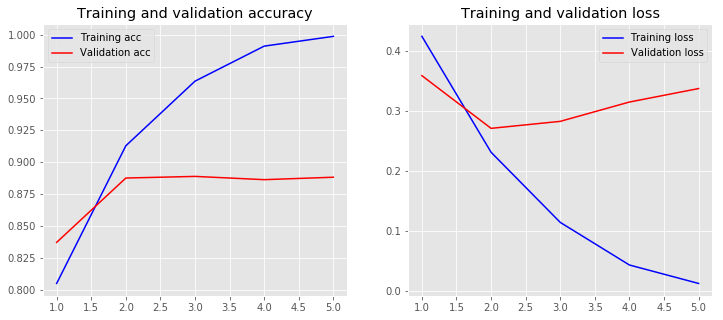

In [0]:
#Plot the graphs
plot_history(history)

In [0]:
#Testing
testing=['Depression','I','I have depression']
testing=tokenizer.texts_to_sequences(testing)
testing = pad_sequences(testing, padding='post', maxlen=maxlen)
for i in range(0,3):
  m=model.predict(np.array([testing[i]]))
  print(m)
  if m[0][0]>.5:
    print("Detected Depression")
  else:
    print("No Depression Detected")